# Introduction to TensorFlow in Python

## Chapter 2

In [2]:
import io
from google.colab import drive
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow import constant, Variable, float32
from tensorflow import multiply, ones_like, matmul, reduce_sum, reshape

import matplotlib.pyplot as plt

In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# Assign the path to a string variable named data_path
data_path = '/content/drive/My Drive/datasets/datacamp/kc_house_data.csv'

# Load the dataset as a dataframe named housing
housing = pd.read_csv(data_path)

# Print the price column of housing
print(housing["price"])

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


In [5]:
# Use a numpy array to define price as a 32-bit float
price = np.array(housing['price'], np.float32)

# Define waterfront as a Boolean using cast
waterfront = tf.cast(housing['waterfront'], tf.bool)

# Print price and waterfront
print(price)
print(waterfront)

[221900. 538000. 180000. ... 402101. 400000. 325000.]
tf.Tensor([False False False ... False False False], shape=(21613,), dtype=bool)


In [ ]:
# # Compute the mean squared error (mse)
# loss = keras.losses.mse(price, predictions)

# # Print the mean squared error (mse)
# print(loss.numpy())

In [ ]:
# # Compute the mean absolute error (mae)
# loss = keras.losses.mae(price, predictions)

# # Print the mean absolute error (mae)
# print(loss.numpy())

In [6]:
features = constant([1., 2., 3., 4., 5.])
targets = constant([ 2.,  4.,  6.,  8., 10.])

# Initialize a variable named scalar
scalar = Variable(1.0, dtype=float32)

# Define the model
def model(scalar, features = features):
  	return scalar * features

# Define a loss function
def loss_function(scalar, features = features, targets = targets):
	# Compute the predicted values
	predictions = model(scalar, features)

	# Return the mean absolute error loss
	return keras.losses.mae(targets, predictions)

# Evaluate the loss function and print the loss
print(loss_function(scalar).numpy())

3.0


In [8]:
size_log = np.log(housing["sqft_lot"])
price_log = np.log(housing["price"])

# Define a linear regression model
def linear_regression(intercept, slope, features = size_log):
	return slope * features + intercept

# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features = size_log, targets = price_log):
	# Set the predicted values
	predictions = linear_regression(intercept, slope, features)

    # Return the mean squared error loss
	return keras.losses.mse(targets, predictions)

# Compute the loss for different slope and intercept values
print(loss_function(0.1, 0.1).numpy())
print(loss_function(0.1, 0.5).numpy())

145.44653034728253
71.86599398430207


9.681412
11.737088
1.129865
1.6700425
0.8090731
0.8125828
0.6220186
0.6118471
0.593378
0.5702836


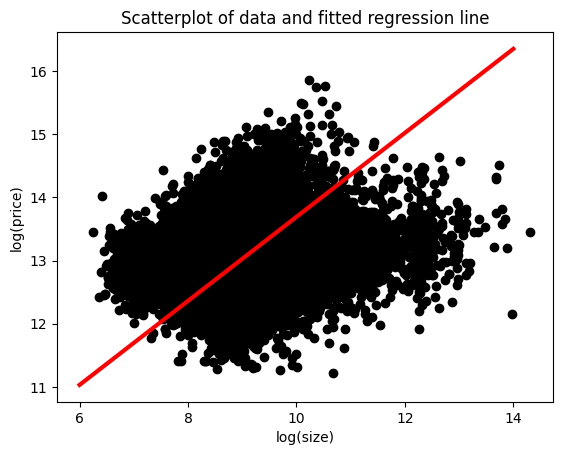

In [9]:
# Initialize an Adam optimizer
opt = keras.optimizers.Adam(0.5)

intercept = Variable(5.0, dtype=float32)
slope = Variable(0.001, dtype=float32)


for j in range(100):
	# Apply minimize, pass the loss function, and supply the variables
	opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])

	# Print every 10th value of the loss
	if j % 10 == 0:
		print(loss_function(intercept, slope).numpy())

def plot_results(intercept, slope):
	size_range = np.linspace(6,14,100)
	price_pred = [intercept+slope*s for s in size_range]
	plt.scatter(size_log, price_log, color = 'black')
	plt.plot(size_range, price_pred, linewidth=3.0, color='red')
	plt.xlabel('log(size)')
	plt.ylabel('log(price)')
	plt.title('Scatterplot of data and fitted regression line')
	plt.show()

# Plot data and regression line
plot_results(intercept, slope)

In [10]:
size_log = np.log(housing["sqft_lot"])
price_log = np.log(housing["price"])
bedrooms = housing["bedrooms"]

# Define the linear regression model
def linear_regression(params, feature1 = size_log, feature2 = bedrooms):
	return params[0] + feature1*params[1] + feature2*params[2]

# Define the loss function
def loss_function(params, targets = price_log, feature1 = size_log, feature2 = bedrooms):
	# Set the predicted values
	predictions = linear_regression(params, feature1, feature2)

	# Use the mean absolute error loss
	return keras.losses.mae(targets, predictions)

# Define the optimize operation
opt = keras.optimizers.Adam()

params = Variable([0.1 , 0.05, 0.02], dtype=float32)

# Perform minimization and print trainable variables
for j in range(10):
	opt.minimize(lambda: loss_function(params), var_list=[params])
	print(params)

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.10099999, 0.05      , 0.02      ], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.10199998, 0.05      , 0.02      ], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.10299997, 0.05      , 0.02      ], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.10399996, 0.05      , 0.02      ], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.10499994, 0.05      , 0.02      ], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.10599994, 0.05      , 0.02      ], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.10699993, 0.05      , 0.02      ], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.10799993, 0.05      , 0.02      ], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, nump

In [11]:
# Define the intercept and slope
intercept = Variable(10.0, float32)
slope = Variable(0.5, float32)

# Define the model
def linear_regression(intercept, slope, features):
	# Define the predicted values
	return intercept + slope * features

# Define the loss function
def loss_function(intercept, slope, targets, features):
	# Define the predicted values
	predictions = linear_regression(intercept, slope, features)

 	# Define the MSE loss
	return keras.losses.mse(targets, predictions)

 # Initialize Adam optimizer
opt = keras.optimizers.Adam()

# Load data in batches
for batch in pd.read_csv(data_path, chunksize=100):
	size_batch = np.array(batch['sqft_lot'], np.float32)

	# Extract the price values for the current batch
	price_batch = np.array(batch['price'], np.float32)

	# Complete the loss, fill in the variable list, and minimize
	opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch), var_list=[intercept, slope])

# Print trained parameters
print(intercept.numpy(), slope.numpy())

10.217887 0.7015986
